<a href="https://colab.research.google.com/github/wallacecarlis/data_science/blob/main/Projeto_de_An%C3%A1lise_de_dados_do_Airbnb_San_Francisco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

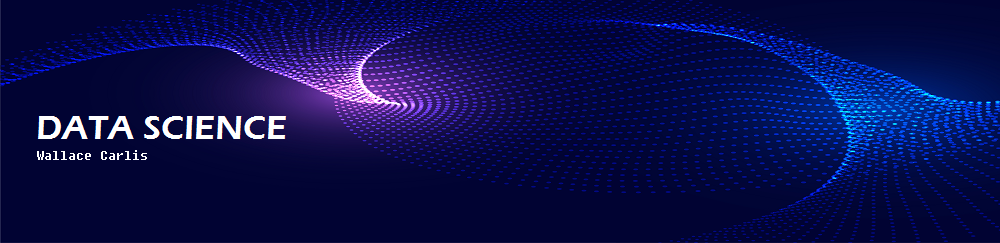


# Análise dos dados do Airbnb - **San Francisco**

O [Airbnb](https://www.airbnb.com.br/) já é considerada a **maior empresa hoteleira da atualidade**, e isso sem **possuir nenhum hotel**.

Aproveitando-se da era da prestação de serviços e conectando pessoas que querem viajar e se hospedar, o AirBnb une de um lado anfitriões que querem alugar seus imóveis de maneira prática, e de outro, clientes que desejam usufruir tal benefício. Para isso, a empresa fornece uma plataforma inovadora para tornar essa hospedagem alternativa uma experiência prazerosa e simples ao mesmo tempo.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Com relação a ciência de dados, uma das iniciativas do Airbnb é disponibilizar seus dados no site para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Vou analisar os dados referentes à cidade de Atenas na Grécia e verificar quais insights podem ser extraídos a partir de dados brutos.**

#### **San Francisco** é uma das principais cidades dos **Estados Unidos** no lado do Oceano Pacífico. É lá que se encontra a famosa ponte **Golden Gate** bem como a antiga prisão de **Alcatraz**. Historicamente, vale destacar o terremoto e incêndio em 1906. Mesmo com tudo isso, a moderna cidade ainda contém o famoso **vale do silício**, berço da atual tecnologia mundial para muitos por ser sede de empresas como **Apple, Google e Facebook**. Pandemia à parte, essa foi a cidade escolhida para esta análise sobre as **locações** do **AirBnb**.

## Obtenção dos Dados

#### Inicialmente tenho que importar os pacotes necessários para manipular a base de dados e faço isso acessando o site do AirBnb e escolhendo o link do arquivo correspondente à cidade de Atenas. Escolhi o arquivo **listings.csv**.


In [229]:
# Importando os pacotes necessários para a análise:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [230]:
# Importando o arquivo "listings.csv" para um DataFrame:
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/san-francisco/2020-12-10/visualisations/listings.csv")

## Análise dos Dados

#### Após a obtenção dos dados, inicio a análise. Esta etapa visa permitir uma melhor **compreensão** de como os dados estão **estruturados**. Uma boa prática é verificar se o nome de cada coluna corresponde de fato ao seu **atributo**, bem como compreender corretamente qual seu conteúdo.


**Dicionário das variáveis**

* **id** - número de id gerado cuja finalidade é identificar o imóvel;
* **name** - nome da propriedade anunciada;
* **host_id** - número de id do proprietário (anfitrião) da propriedade;
* **host_name** - nome do anfitrião;
* **neighbourhood_group** - esta coluna não possui valor válido;
* **neighbourhood** - nome do bairro;
* **latitude** - coordenada da latitude do imóvel;
* **longitude** - coordenada da longitude do imóvel;
* **room_type** - informação sobre o tipo de quarto que é ofertado;
* **price** - preço para alugar o imóvel;
* **minimum_nights** - período mínimo de noites por reserva;
* **number_of_reviews** - número de reviews que o imóvel possui;
* **last_review** - data do último review;
* **reviews_per_month** - quantidade de reviews por mês;
* **calculated_host_listings_count** - quantidade de imóveis do mesmo anfitrião;
* **availability_365** - número de dias disponíveis em 365 dias.

Novamente como boa prática é muito prudente verificar o conteúdo da base de dados, nosso **dataset**, analisando as primeiras entradas com o método **head**, por padrão, as cinco primeiras.

In [231]:
# Exibindo as 5 primeiras entradas:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,146,2,270,2020-11-24,1.95,1,215
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,2017-08-06,0.79,1,365
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,19,2020-03-06,0.14,8,365
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,8,2018-09-12,0.10,8,365
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77525,-122.43637,Entire home/apt,768,5,28,2019-06-28,0.21,2,365


In [232]:
# Analisando os nomes únicos dos bairros:
df.neighbourhood.unique()

array(['Western Addition', 'Bernal Heights', 'Haight Ashbury', 'Mission',
       'Nob Hill', 'Downtown/Civic Center', 'Castro/Upper Market',
       'Inner Sunset', 'Noe Valley', 'Twin Peaks', 'Potrero Hill',
       'Outer Richmond', 'Glen Park', 'Ocean View', 'Pacific Heights',
       'Financial District', 'South of Market', 'Russian Hill',
       'Outer Sunset', 'Marina', 'Inner Richmond', 'Excelsior',
       'Seacliff', 'Chinatown', 'West of Twin Peaks', 'Bayview',
       'North Beach', 'Presidio', 'Presidio Heights', 'Diamond Heights',
       'Parkside', 'Outer Mission', 'Lakeshore', 'Crocker Amazon',
       'Golden Gate Park', 'Visitacion Valley'], dtype=object)

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

#### É importante identificar a quantidade de **linhas** e **colunas**, além de mensurar quais são os diferentes **tipos** de dados presentes em cada coluna.

In [233]:
# Identificando o volume de dados do DataFrame:
print(f"Entradas:\t {df.shape[0]}")
print(f"Entradas:\t {df.shape[1]}")

# Verificando os tipos de dados de cada coluna:
display(df.dtypes)

Entradas:	 7087
Entradas:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

#### Uma verificação imprescindível está relacionada aos valores ausentes, também conhecidos como nulos ou faltantes. Isso implica diretamente na qualidade da base de dados.

In [234]:
# Ordenando de forma decrescente as variáveis por seus valores ausentes:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.240299
last_review                       0.240299
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

#### Após a ordenação decrescente da quantidade das variáveis quanto ao olhar sobre valores ausentes percebe-se que:
* **neighbourhood_group** - tem todos os seus dados com valores ausentes;
* **reviews_per_month** e **last_review** - cerca de **24%** dos dados ausentes;
* as demais colunas não possuem dados ausentes. 

### **Q3. Qual o tipo de distribuição das variáveis?**

#### Para melhorar a análise uma boa visualização das distribuições se faz necessário. Aqui eu **ploto** um **histograma** para identificar as distribuições nas variáveis.

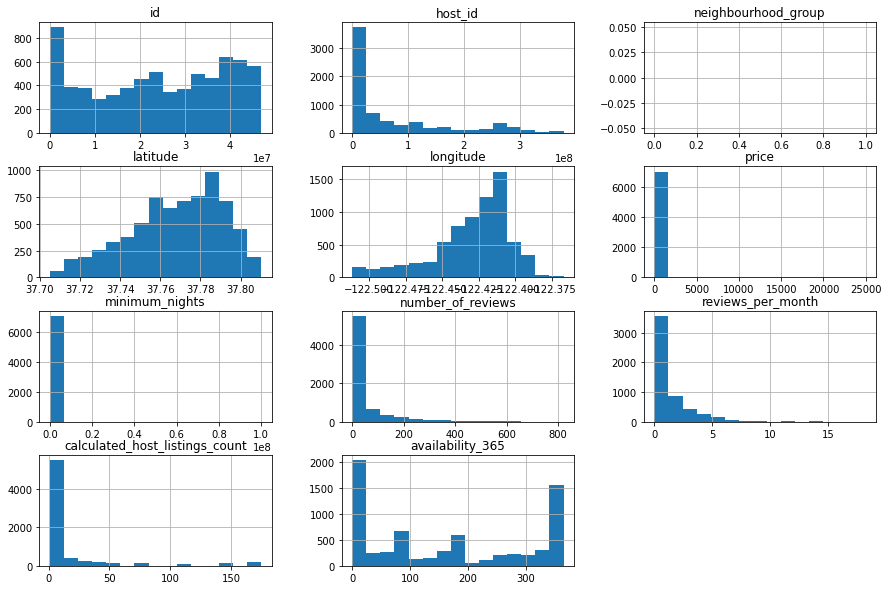

In [235]:
# Plotando o histograma das variáveis:
df.hist(bins= 15, figsize=(15, 10));

#### Após a observação sobre as distribuições, em algumas colunas foi possível observar que existem **outliers**, que são valores totalmente diferentes da normalidade nos dados, e eles podem interferir negativamente em nossa análise.

#### Duas técnicas nos auxiliam numa melhor compreensão dos **outliers**:
* Resumo estatístico por meio do método describe;
* Plotagem de boxplots.

In [236]:
# Aplicando o método describe nas variáveis mais importantes:
df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month",
    "calculated_host_listings_count", "availability_365"]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7087.000000,7.087000e+03,7087.000000,5384.000000,7087.000000,7087.000000
mean,248.599125,1.412965e+04,43.570340,1.278689,17.056441,163.652603
std,817.421870,1.187869e+06,82.587244,1.654505,37.205195,142.376037
min,10.000000,1.000000e+00,0.000000,0.010000,1.000000,0.000000
25%,85.000000,2.000000e+00,1.000000,0.180000,1.000000,1.000000
50%,133.000000,3.000000e+01,7.000000,0.600000,2.000000,150.000000
75%,215.000000,3.000000e+01,46.000000,1.770000,11.000000,328.000000
max,25000.000000,1.000000e+08,821.000000,18.250000,175.000000,365.000000


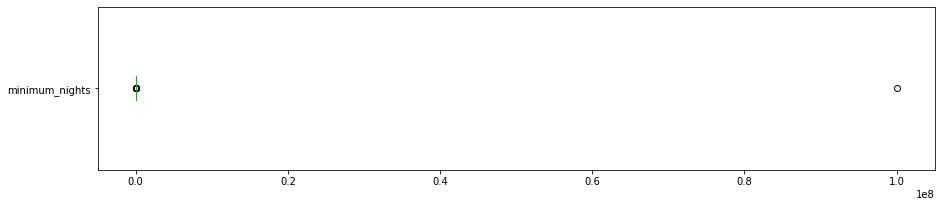

minimum_nights - valores acima de 31: 
191 entradas
2.70%


In [237]:
# Plotando o box plot da coluna minimum_nights:
df.minimum_nights.plot(kind = "box", vert = False, figsize = (15, 3))
plt.show()

# Quantidade de valores de período de locação acima de 31 dias:
print("minimum_nights - valores acima de 31: ")
print(f"{(len(df[df.minimum_nights > 31]))} entradas")
print("{:.2f}%".format((len(df[df.minimum_nights > 31])/df.shape[0])*100))

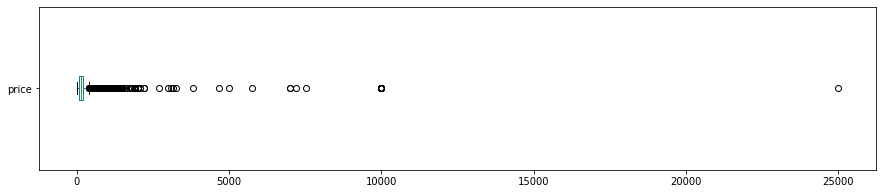


price - valores acima de 1500
70 entradas
0.99%


In [238]:
# Plotando o box plot da coluna price:
df.price.plot(kind = "box", vert = False, figsize = (15, 3))
plt.show()

# Quantidade de valores de locações superiores a 1500 para a coluna price:
print("\nprice - valores acima de 1500")
print(f"{len(df[df.price > 1500])} entradas")
print("{:.2f}%".format((len(df[df.price > 1500]) / df.shape[0]) * 100))

#### Uma vez identificados os **outliers** e **ausentes** podemos removê-los para em seguida plotar um novo **histograma** e verificar uma melhor assertividade na análise.

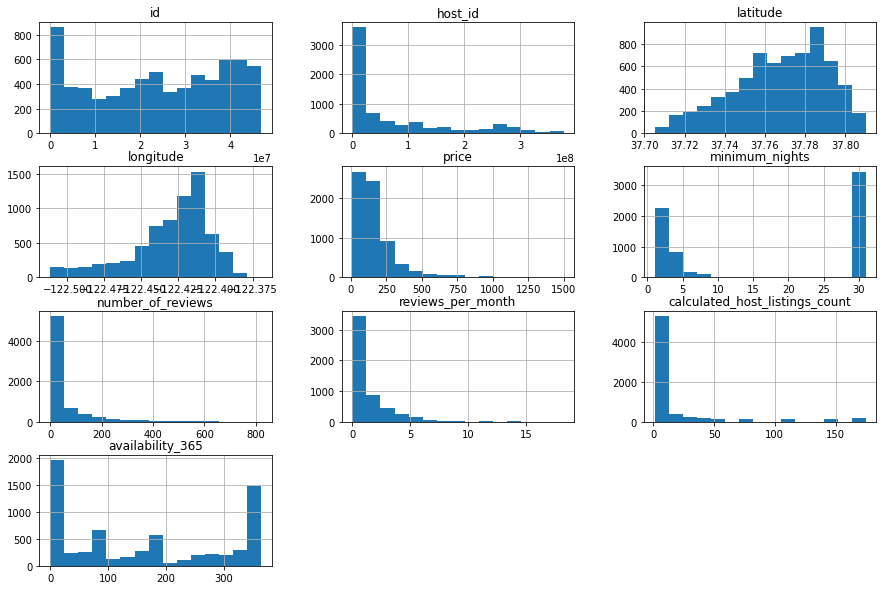

In [239]:
# Removendo os valores outliers e inserindo o conteúdo em um novo DataFrame (cópia):
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 31].index, axis = 0, inplace = True)

# Removendo os valores ausentes:
df_clean.drop("neighbourhood_group", axis = 1, inplace = True)

# Plotando um novo histograma para as variáveis:
df_clean.hist(bins = 15, figsize = (15, 10));

#### Agora que limpei os dados e gerei uma cópia da base de dados, vale a pena novamente passar pelo método **describe** para uma nova inferência estatística.

In [240]:
# Exibição estatística da base de dados sem valores ausentes e outliers:
df_clean[["price", "minimum_nights", "number_of_reviews", "reviews_per_month",
    "calculated_host_listings_count", "availability_365"]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6830.000000,6830.000000,6830.000000,5255.000000,6830.000000,6830.000000
mean,181.114641,16.290190,44.983016,1.303728,17.071596,162.813177
std,171.721283,13.877193,83.739058,1.665509,37.404056,141.747287
min,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,85.000000,2.000000,1.000000,0.190000,1.000000,2.000000
50%,131.000000,30.000000,8.000000,0.620000,2.000000,148.000000
75%,209.000000,30.000000,49.000000,1.800000,11.000000,324.000000
max,1500.000000,31.000000,821.000000,18.250000,175.000000,365.000000


### **Q4. Como saber a média dos preços de aluguel?**

#### Um item relevante quando se trata de locação é o seu valor. Encontramos a **média** dos preços praticados selecionando nosso DataFrame, seguido pela coluna do preço (price) e o método de média (mean).

In [241]:
# Obtendo a média da coluna price:
df_clean.price.mean()

181.11464128843338

### **Q4. Existe correlação entre as variáveis?**

#### A correlação ocorre na existência de relação entre variáveis, quando em sua análise percebe-se nítida influência. A relação pode ser medida apontando para sua intensidade, função do coeficiente de correlação.

#### Para uma melhor observação vou:
* Criar uma matriz de correlação;
* Gerar um **heatmap** a partir desta matriz usando a biblioteca **seaborn**.

In [242]:
# Criando uma matriz de correlação:
corr = df_clean[["price", "minimum_nights", "number_of_reviews", "reviews_per_month",
                 "calculated_host_listings_count", "availability_365"]].corr()

# Exibindo a matriz de correlação:
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.207107,-0.097470,-0.154779,-0.104161,-0.051185
minimum_nights,-0.207107,1.000000,-0.344778,-0.407252,0.228438,0.289678
number_of_reviews,-0.097470,-0.344778,1.000000,0.757626,-0.180502,-0.019509
reviews_per_month,-0.154779,-0.407252,0.757626,1.000000,-0.186971,-0.024365
calculated_host_listings_count,-0.104161,0.228438,-0.180502,-0.186971,1.000000,0.042743
availability_365,-0.051185,0.289678,-0.019509,-0.024365,0.042743,1.000000


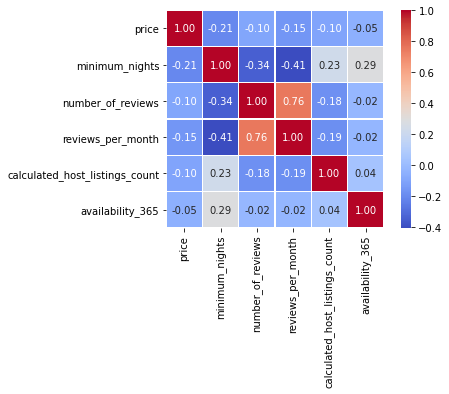

In [243]:
# Plotando um heatmap a partir das correlações:
sns.heatmap(corr, cmap= "coolwarm", fmt= ".2f", square= True, linewidths= 0.1, vmax= 1.0, linecolor= "white", annot= True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

#### Neste trecho irei verificar qual o tipo de locação disponível. Geralmente são apartamentos ou casas, apenas quartos, ou ainda compartilhamento de quartos com outras pessoas.

#### Vou contar a quantidade de ocorrências para cada tipo de locação pela coluna **room_type** usando o método **value_counts**.

In [244]:
# Exibindo a quantidade de cada tipo de imóvel disponível para locação:
df_clean.room_type.value_counts()

Entire home/apt    4118
Private room       2431
Shared room         191
Hotel room           90
Name: room_type, dtype: int64

In [245]:
# Exibindo a porcentagem de cada tipo de imóvel disponível para locação:
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.602928
Private room       0.355930
Shared room        0.027965
Hotel room         0.013177
Name: room_type, dtype: float64

### **Q6. Qual a localidade de maior valor do dataset?**

#### Como mencionado, geralmente numa locação um dos principais critérios a ser levado em consideração é o **preço**. Aqui faço uma pesquisa por **valores** entre os bairros usando o **groupby**, trazendo os **dez** primeiros resultados.


In [246]:
# Exibindo os preços por bairros em média:
df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending = False)[:10]

neighbourhood
Diamond Heights        289.333333
Marina                 285.938272
Russian Hill           279.313433
Pacific Heights        274.738462
Presidio               260.333333
Glen Park              247.285714
Presidio Heights       239.250000
Castro/Upper Market    236.676829
Twin Peaks             222.055556
North Beach            218.952381
Name: price, dtype: float64

#### Vale a pena observar e analisar o primeiro lugar obtido atentando para a quantidade de imóveis disponíveis para locação. Pode ser que não traduza a realidade de valores médios obtidos por sua quantidade.

In [247]:
# Exibindo a quantidade de imóveis dos três primeiros lugares em valores médios:
print(f"Quantidade em Diamond Heights: {df_clean[df_clean.neighbourhood == 'Diamond Heights'].shape[0]}")
print(f'Quantidade em Marina: {df_clean[df_clean.neighbourhood == "Marina"].shape[0]}')
print(f'Quantidade em Russian Hill: {df_clean[df_clean.neighbourhood == "Russian Hill"].shape[0]}')


Quantidade em Diamond Heights: 9
Quantidade em Marina: 162
Quantidade em Russian Hill: 201


#### Podemos ainda plotar os pontos de cada imóvel uma vez que na base temos os dados de **latitude** e **longitude**.

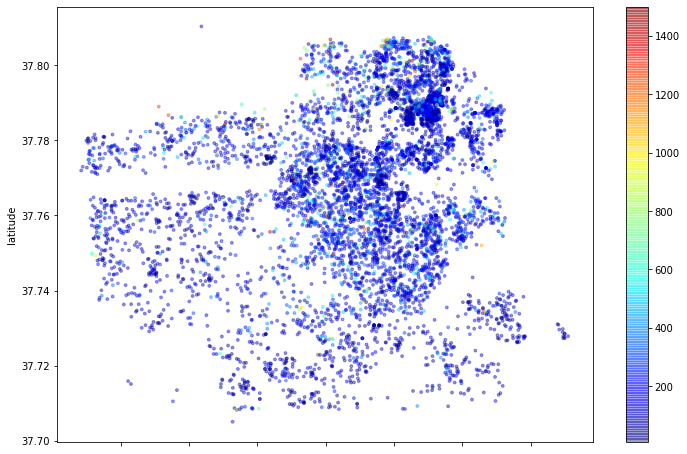

In [248]:
# Plotando a localização dos imóveis pela latitude-longitude:
df_clean.plot(kind = "scatter", x= "longitude", y= "latitude", alpha= 0.4,
              c= df_clean["price"], s= 8, cmap= plt.get_cmap("jet"), figsize= (12, 8));

### **Q7. Qual é a média do mínimo de noites para aluguel?**

#### Para sabermos o **período médio** de locações basta utilizarmos a coluna **minimum_nights** e o método **mean**.

In [249]:
# Exibindo o período médio de locações da coluna minimum_nights:
int(df_clean.minimum_nights.mean())

16

## Conclusões


#### Foi realizada apenas uma análise superficial dos dados do AirBnb de imóveis locados na cidade de **San Francisco**. Percebeu-se que em alguns bairros, como em **Diamond Heights**, apesar de ser o maior valor médio para locações, há poucos imóveis disponíveis, no caso 9, distante dos outros dois primeiros (**Marina** 162, **Russian Hill** 201). Isso pode levar a uma compreensão inexata sobre média geral de valores, por exemplo.

#### Outra visualização importante foi que o período médio de locações costuma ser superior a duas semanas. No caso, **16 dias**. Contudo, distante da mediana (**30** dias).

#### Uma observação importante diz respeito à **correlação** entre o número de **visualizações** pelas **visualizações mensais**. Entretanto, aponta inicialmente apenas para uma forte procura pelos imóveis na cidade. Vale também mencionar que em **60%** das locações os locatários preferiram optar pela comodidade de se locar a casa ou o apartamento por inteiro, sem compartilhar o imóvel com outros hóspedes.

#### O dataset utilizado para esta análise inicial é uma versão resumida extraída do próprio site do **AirBnb**. Existe outra versão com 74 atributos, caso deseja-se uma inferência mais completa.